This project is the resolution of the "Computer vision in practice" course challenge, created by the teacher Anderson Brilhador from the Federal University of Technology - Paraná

For more information, access the course page on github:
https://github.com/Brilhador/computer-vision-in-practice

# Whiteflies

A whitefly is a pest that causes major damage to crops directly or indirectly, acting as a vector of phytopathogenic virus. Therefore, the development of control methods of this bug is fundamental for agribusiness.

An application based on image processing for the counting of flies present in a plant would make a possible management for this pest.

So ultimately, the objective of this notebook is to write a program that counts the number of whiteflies in the three images below.


Reference article (portuguese): https://sol.sbc.org.br/index.php/erigo/article/view/9095/8997

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
fly1 = cv2.imread('./figures/moscas1.jpg')
fly2 = cv2.imread('./figures/moscas2.jpg')
fly3 = cv2.imread('./figures/moscas3.jpg')

fly1_org = cv2.cvtColor(fly1, cv2.COLOR_BGR2RGB)
fly2_org = cv2.cvtColor(fly2, cv2.COLOR_BGR2RGB)
fly3_org = cv2.cvtColor(fly3, cv2.COLOR_BGR2RGB)

fly1_gray = cv2.cvtColor(fly1, cv2.COLOR_BGR2GRAY)
fly2_gray = cv2.cvtColor(fly2, cv2.COLOR_BGR2GRAY)
fly3_gray = cv2.cvtColor(fly3, cv2.COLOR_BGR2GRAY)

In [3]:
def plotImages(figs, names, fig_size=(20,20)):
    fig = plt.figure(figsize = fig_size)

    for i in np.arange(0, len(figs)):
        resize = cv2.resize(figs[i], (300,300))
        axe = fig.add_subplot(1, len(figs), i+1)
        axe.imshow(resize, cmap='gray'), axe.set_title(names[i], fontsize= 20), axe.axis('on')

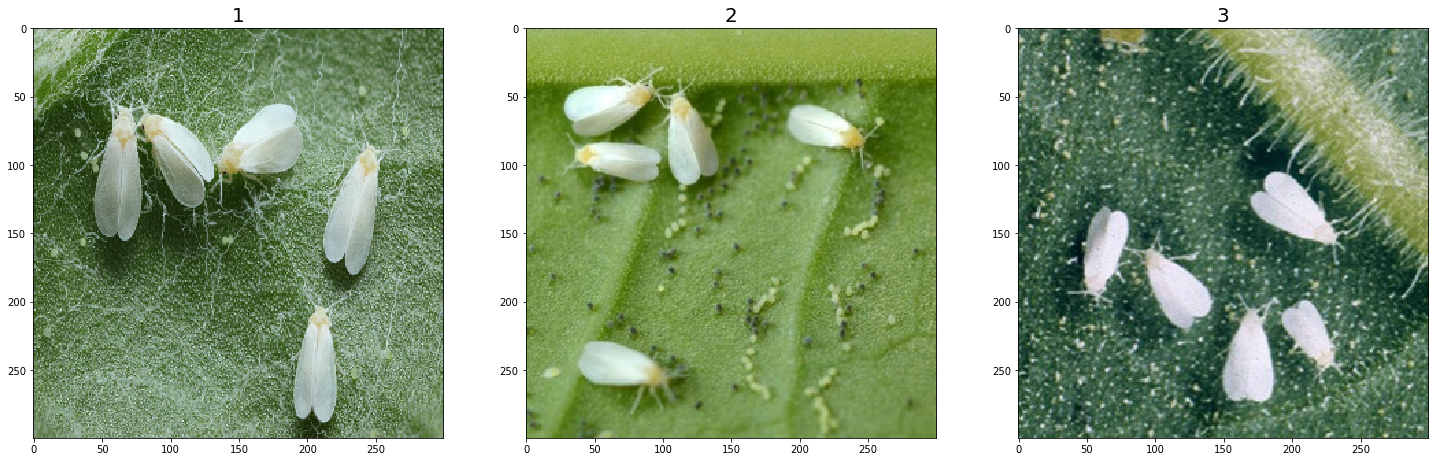

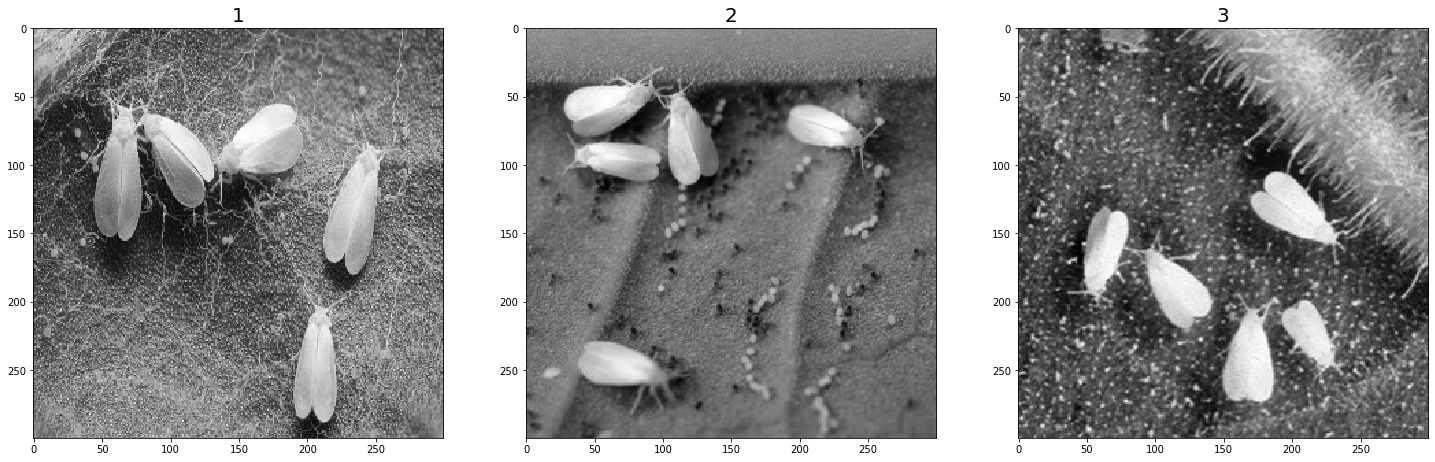

In [4]:
org = [fly1_org, fly2_org, fly3_org]
gray = [fly1_gray, fly2_gray, fly3_gray]
index = np.arange(1, len(org)+1)

plotImages(org, index, (25,25))
plotImages(gray, index, (25,25))

In [5]:
def plotGrid(X, Image_title, grid_Dim, fig_size, SpaceImages=0.4, axis_state='off'):
    fig, axes = plt.subplots(grid_Dim[0], grid_Dim[1], figsize = fig_size)
    axes = axes.ravel()

    for i in np.arange(0, grid_Dim[0] * grid_Dim[1]):
        #index = np.random.randint(0, len(X))
        axes[i].imshow(X[i], cmap='gray')
        axes[i].set_title(Image_title[i], fontsize=50)
        axes[i].axis(axis_state)
    plt.subplots_adjust(hspace = SpaceImages)

In [6]:
def findGrid(total):
    res=[]
    for i in range(1, total+1):
        for j in range(1, total+1):
            if i * j == total and i > j:
                res.append((i, j))
    return res[0]

findGrid(63)

(9, 7)

In [7]:
def plotAllCombinations(img, lim1, lim2=255, kernel_min=5, kernel_max=9, 
                        lim_step=15, figsize=(75,75), hspace=0.4, title_mode = 'long'):
    
    blurs, medians, gaussians = [], [], [] 
    threshB, threshM, threshG = [], [], [] 
    namesB, namesM, namesG = [], [], []
    
    # generate all kernels 5, 7, 9... 17
    kernels = [i for i in np.arange(kernel_min, kernel_max+1) if i%2 != 0] 
    for kernel in kernels:
        blurs.append(cv2.blur(img, (kernel, kernel), 0))
        medians.append(cv2.medianBlur(img, kernel))
        gaussians.append(cv2.GaussianBlur(img, (kernel, kernel), 0))
        
    #ret_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) #get otsu limiar ret_
    limiars = [i for i in range(lim1, lim2, lim_step)]
    
    for limiar in limiars:
        for blur in blurs:
            ret, trB = cv2.threshold(blur, limiar, 255, cv2.THRESH_BINARY)
            threshB.append(trB)
        for median in medians:
            ret, trM = cv2.threshold(median, limiar, 255, cv2.THRESH_BINARY)
            threshM.append(trM)
        for gaussian in gaussians:
            ret, trG = cv2.threshold(gaussian, limiar, 255, cv2.THRESH_BINARY)
            threshG.append(trG)
            
    for i in limiars:
        for j in kernels:
            if title_mode == 'long':
                namesB.append("(Thresh, {} to {})\n(Blur, {})".format(i, lim2, j))
                namesM.append("(Thresh, {} to {})\n(Med, {})".format(i, lim2, j))
                namesG.append("(Thresh, {} to {})\n(Gauss, {})".format(i, lim2, j))
            if title_mode == 'short':
                namesB.append("T{}-B{}".format(i, j))
                namesM.append("T{}-M{}".format(i, j))
                namesG.append("T{}-G{}".format(i, j))
        
    names = namesB + namesM + namesG   
    final = threshB + threshM + threshG
    grid = findGrid(len(final))
    print("Total of Combinations: {}\nGrid dims = {}\n\nLoading images...".format(len(final),grid))
    
    plotGrid(final, names, grid_Dim = grid, fig_size = figsize, SpaceImages=hspace)

Total of Combinations: 63
Grid dims = (9, 7)

Loading images...


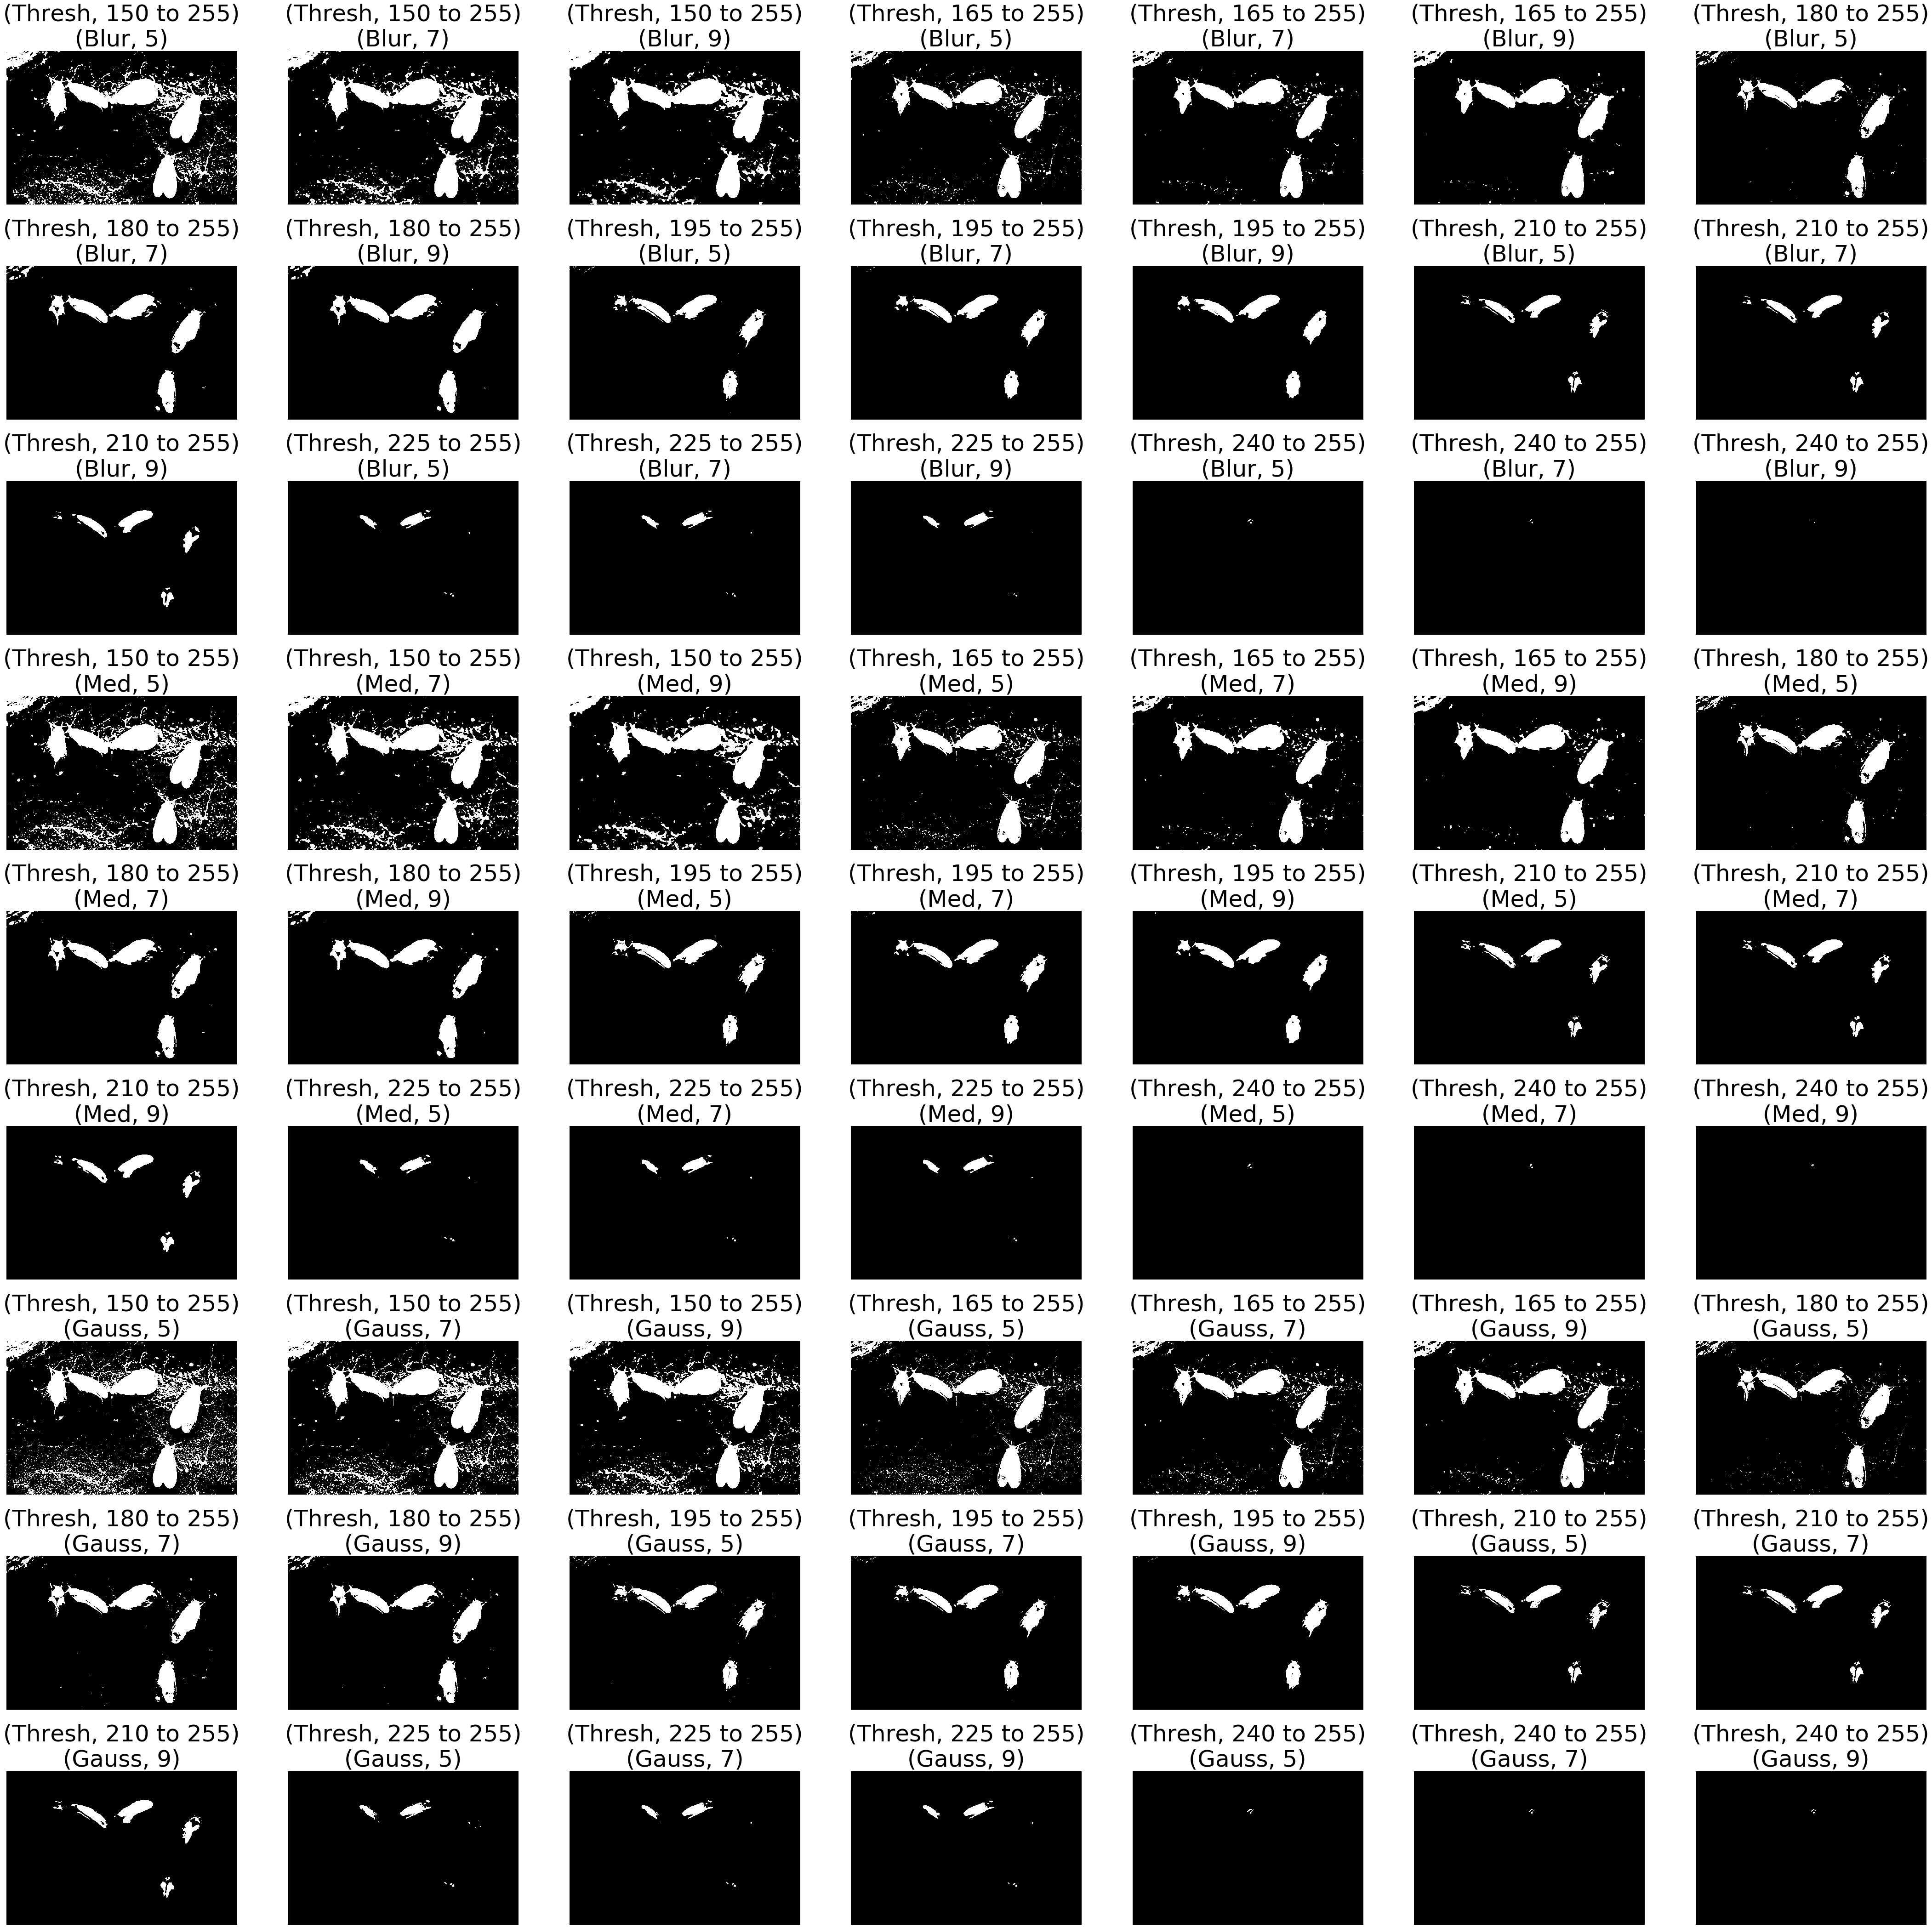

In [8]:
plotAllCombinations(fly1_gray, lim1=150)

In [9]:
def plotHistogram(img):
    h = cv2.calcHist([img], [0], None, [256], [0, 256])
    plt.figure()
    plt.title("Histogram")
    plt.xlabel("Intensity")
    plt.ylabel("Number of Pixels")
    plt.plot(h)
    plt.xlim([0, 256])
    plt.show()

# Fly #1

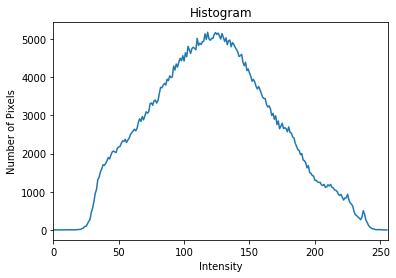

In [10]:
plotHistogram(fly1_gray)

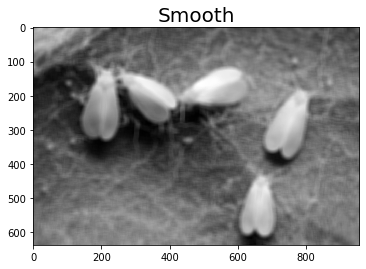

In [11]:
smooth_img = cv2.blur(fly1_gray, (15,15),0)
plt.title("Smooth", fontsize= 20)
plt.imshow(smooth_img, cmap='gray')

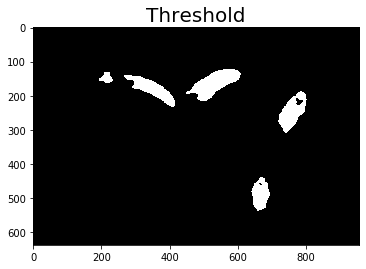

In [12]:
ret, binarized_img = cv2.threshold(smooth_img, 201, 255, cv2.THRESH_BINARY)
plt.title("Threshold", fontsize= 20)
plt.imshow(binarized_img, cmap='gray')

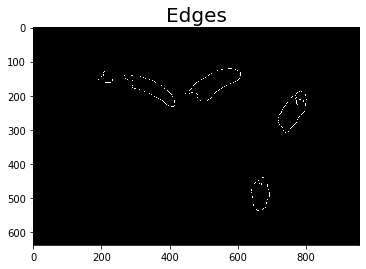

In [13]:
edge_img = cv2.Canny(binarized_img, 100, 200)
plt.title("Edges", fontsize= 20)
plt.imshow(edge_img,cmap='gray')

The number of flies is: 5


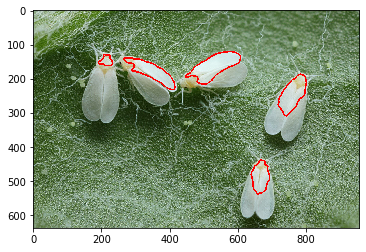

In [14]:
objects, tr = cv2.findContours(edge_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(fly1_org, objects, -1, (255, 0, 0), 3) 

print("The number of flies is:", len(objects))
plt.imshow(fly1_org)

# Fly #2

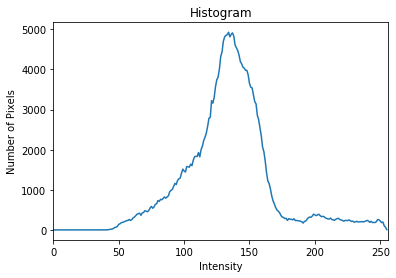

In [15]:
plotHistogram(fly2_gray)

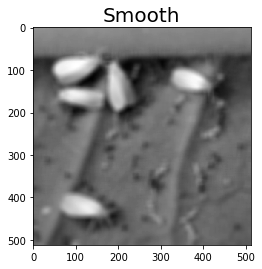

In [16]:
smooth_img = cv2.blur(fly2_gray, (15,15), 0)
plt.title("Smooth", fontsize= 20)
plt.imshow(smooth_img, cmap='gray')

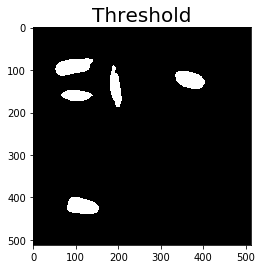

In [17]:
ret, binarized_img = cv2.threshold(smooth_img, 201, 255, cv2.THRESH_BINARY)
plt.title("Threshold", fontsize= 20)
plt.imshow(binarized_img, cmap='gray')

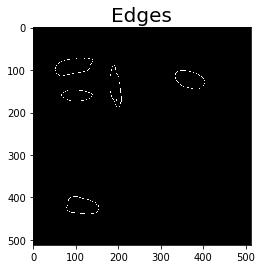

In [18]:
edge_img = cv2.Canny(binarized_img, 100, 200)
plt.title("Edges", fontsize= 20)
plt.imshow(edge_img,cmap='gray')

The number of flies is: 5


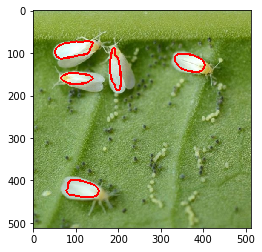

In [19]:
objects, tr = cv2.findContours(edge_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(fly2_org, objects, -1, (255, 0, 0), 3) 

print("The number of flies is:", len(objects))
plt.imshow(fly2_org)

# Fly #3

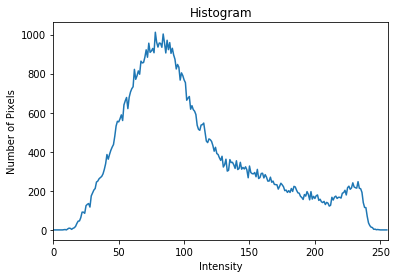

In [20]:
plotHistogram(fly3_gray)

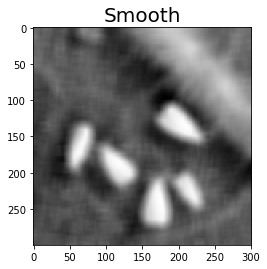

In [21]:
smooth_img = cv2.blur(fly3_gray, (15,15), 0)
plt.title("Smooth", fontsize= 20)
plt.imshow(smooth_img, cmap='gray')

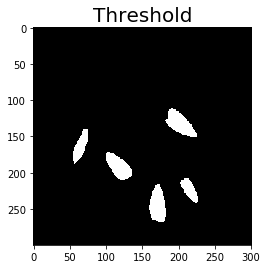

In [22]:
ret, binarized_img = cv2.threshold(smooth_img, 201, 255, cv2.THRESH_BINARY)
plt.title("Threshold", fontsize= 20)
plt.imshow(binarized_img, cmap='gray')

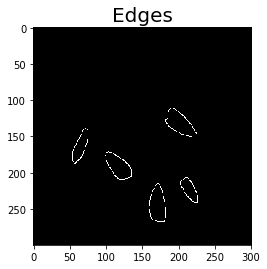

In [23]:
edge_img = cv2.Canny(binarized_img, 100, 200)
plt.title("Edges", fontsize= 20)
plt.imshow(edge_img,cmap='gray')

The number of flies is: 5


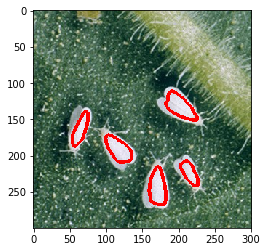

In [24]:
objects, tr = cv2.findContours(edge_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(fly3_org, objects, -1, (255, 0, 0), 3) 

print("The number of flies is:", len(objects))
plt.imshow(fly3_org)